In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from pickle import dump, load
from scipy import stats
pd.options.display.max_rows = None


In [2]:
dpi = 50

In [3]:
 na_values = ["", 
             "#N/A", 
             "#N/A N/A", 
             "#NA", 
             "-1.#IND", 
             "-1.#QNAN", 
             "-NaN", 
             "-nan", 
             "1.#IND", 
             "1.#QNAN", 
             "<NA>", 
             "N/A", 
#              "NA", 
             "NULL", 
             "NaN", 
             "n/a", 
             "nan", 
             "null"]


In [4]:
dict_dtype = {'MS SubClass' : str, 
                'Overall Qual' : str,
               'Overall Cond' : str,
               'Bsmt Full Bath' : str,
                'Bsmt Half Bath' : str,
                'Full Bath' : str,
                'Half Bath' : str,
                'Bedroom AbvGr' : str,
                'Kitchen AbvGr' : str,
                'TotRms AbvGrd' : str,
                'Fireplaces' : str,
                'Garage Cars' : str}

In [5]:
dummies_numeric_cols = ['Bsmt Full Bath',
                        'Bsmt Half Bath',
                        'Full Bath',
                        'Half Bath',
                        'Bedroom AbvGr',
                        'Kitchen AbvGr',
                        'TotRms AbvGrd',
                        'Fireplaces',
                        'Garage Cars']

In [6]:
dummies_nominal_cols = ['MS SubClass',
                        'MS Zoning',
                        'Street',
                        'Land Contour',
                        'Lot Config',
                        'Neighborhood',
                        'Condition 1',
                        'Bldg Type',
                        'House Style',
                        'Roof Style',
                        'Exterior 1st',
                        'Mas Vnr Type',
                        'Foundation',
                        'Central Air',
                        'Garage Type',
                        'Sale Type',
                        'house_with_pool']

In [7]:
dict_ordinal_encode = {
                        'Lot Shape' : {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
                        'Utilities' : {'AllPub':3, 'NoSeWa':2, 'NoSeWr':1},
                        'Land Slope': {'Sev' : 3, 'Mod' :2, 'Gtl' :1},
                        'Overall Qual' : {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10},
                        'Overall Cond' : {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10},
                        'Exter Qual' : {'NA':0, 'Po':1, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                        'Exter Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Bsmt Qual' : {'NA':0, 'Po':1, 'Fa':1, 'TA':1, 'Gd':2, 'Ex':3},
                        'Bsmt Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Bsmt Exposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0},
                        'BsmtFin Type 1' : {'GLQ' : 6, 'Unf' : 5, 'ALQ' : 4, 'BLQ' : 3, 'LwQ' : 2, 'Rec' : 1, 'NA' : 0},
                        'BsmtFin Type 2' : {'GLQ' : 6, 'Unf' : 5, 'ALQ' : 4, 'BLQ' : 3, 'LwQ' : 2, 'Rec' : 1, 'NA' : 0},
                        'Heating QC' : {'NA':0, 'Po':1, 'Fa':1, 'TA':1, 'Gd':2, 'Ex':3},
                        'Electrical' : {'Sbrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                        'Kitchen Qual' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Functional' : {'Typ' : 8, 'Min1' : 7, 'Maj1' : 6, 'Min2' : 5, 'Mod' : 4, 'Sev' : 3, 'Maj2' : 2, 'Sal' : 1},
                        'Fireplace Qu' : {'NA':0, 'Po':1, 'Fa':1, 'TA':1, 'Gd':1, 'Ex':1},
                        'Garage Finish' : {'Fin' : 3, 'RFn' : 3, 'Unf' : 3, 'NA' : 1},
                        'Garage Qual' : {'NA':0, 'Po':1, 'Fa':1, 'TA':1, 'Gd':1, 'Ex':2},
                        'Garage Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Paved Drive' : {'Y' : 3, 'P' : 2, 'N' : 1},
                        'Pool QC' : {'NA':0, 'Po':1, 'Fa':1, 'TA':2, 'Gd':2, 'Ex':3},
                        'Fence' : {'NA' : 5, 'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1}}

In [8]:
dict_nominal_combine_labels = {
                                'Lot Config' :  {'Inside':'Inside', 'Corner':'Corner', 'CulDSac':'CulDSac', 'FR2':'FR', 'FR3':'FR'},
                                'House Style' : {'1Story':'1Story', '2Story':'2Story', '1.5Fin': '1.5Fin', 'SLvl':'SLvl', 
                                                 'SFoyer':'SFoyer', '2.5Unf':'Unf', '1.5Unf':'Unf', '2.5Fin':'Unf'},
                                'Roof Style' : {'Gable':'Gable', 'Hip':'Hip', 'Flat':'Flat', 'Gambrel':'Other', 
                                                'Mansard':'Other', 'Shed':'Other'},
                                'Exterior 1st' : {'VinylSd' : 'VinylSd', 'MetalSd' : 'MetalSd', 'HdBoard' : 'HdBoard', 
                                                  'Wd Sdng' : 'Wd Sdng', 'Plywood' : 'Plywood',
                                                'CemntBd' : 'CemntBd', 'BrkFace' : 'BrkFace', 'WdShing' : 'WdShing', 
                                                  'AsbShng' : 'AsbShng', 'Stucco' : 'Stucco',
                                                'BrkComm' : 'Other', 'Stone' : 'Other', 'CBlock' : 'Other', 
                                                  'ImStucc' : 'Other', 'AsphShn' : 'Other', 'PreCast' : 'Other'},
                                'Mas Vnr Type' : {'BrkFace':'BrkFace', 'None':'None', 'NA':'Other', 'Stone':'Stone', 
                                                  'BrkCmn':'Other', 'CBlock':'CBlock'},
                                'Sale Type' : {'CWD' : 'Oth', 'Con' : 'Oth', 'ConLD' : 'Oth', 'ConLI' : 'Oth',
                                              'ConLw' : 'Oth', 'New' : 'New', 'Oth' : 'Oth', 'WD ' : 'WD', 'VWD' : 'Oth'},
                                'Foundation' : {'CBlock' : 'CBlock','PConc' : 'PConc','BrkTil' : 'BrkTil',
                                                'Slab' : 'Other','Stone' : 'Other','Wood' : 'Other'},
                                'Bldg Type' : {'2fmCon' : 'Other','Duplex' : 'Other','Twnhs' : 'Other','TwnhsE' : 'Other',
                                              '1Fam':'1Fam'},
                                'Condition 1' : {'Feedr' : 'RR','Norm' : 'Norm','PosA' : 'Pos','PosN' : 'Pos',
                                    'RRAe' : 'RR','RRAn' : 'RRN','RRNe' : 'RR','RRNn' : 'RRN', 'Artery' : 'RR'}

}

In [9]:
features = ['MS SubClass',
            'MS Zoning',
            'Lot Area',
            'Street',
            'Lot Shape',
            'Land Contour',
            'Lot Config',
            'Neighborhood',
            'Condition 1',
            'Bldg Type',
            'House Style',
            'Overall Qual',
            'Roof Style',
            'Exterior 1st',
            'Mas Vnr Type',
            'Exter Qual',
            'Foundation',
            'Bsmt Qual',
            'Bsmt Exposure',
            'BsmtFin Type 1',
            'Total Bsmt SF',
            'Heating QC',
            'Central Air',
            'Gr Liv Area',
            'Bsmt Full Bath',
            'Bsmt Half Bath',
            'Full Bath',
            'Half Bath',
            'Bedroom AbvGr',
            'Kitchen AbvGr',
            'Kitchen Qual',
            'Fireplace Qu',
            'Garage Type',
            'Garage Finish',
            'Garage Cars',
            'Garage Qual',
            'Paved Drive',
            'Pool Area',
            'Sale Type']

In [10]:
drop_columns = ['Id',
                'PID',
                'TotRms AbvGrd',
                'Fireplaces',
                'Garage Yr Blt',
                'Utilities',
                'Land Slope',
                'Overall Cond',
                'Exter Cond',
                'Bsmt Cond',
                'BsmtFin Type 2',
                'Electrical',
                'Functional',
                'Garage Cond',
                'Fence',
                'Lot Frontage',
                'Mas Vnr Area',
                'BsmtFin SF 1',
                'BsmtFin SF 2',
                'Bsmt Unf SF',
                '1st Flr SF',
                '2nd Flr SF',
                'Low Qual Fin SF',
                'Garage Area',
                'Wood Deck SF',
                'Open Porch SF',
                'Enclosed Porch',
                '3Ssn Porch',
                'Screen Porch',
                'Misc Val',
                 'Alley',
                'Condition 2',
                'Roof Matl',
                'Exterior 2nd',
                'Heating',
                'Misc Feature',
                'Fence',
                'Yr Sold',
                'Year Built',
                'Year Remod/Add',
                'Mo Sold',
                'Pool Area',
                'Street',
                'Roof Style',
                'Mas Vnr Type',
                "Lot Shape",
                'Lot Config',
                'Lot Area',
                'Land Contour'
]

In [11]:
#start the model with both For Sure and Maybe columns as string types
df = pd.read_csv('../datasets/train_clean_v1.csv', index_col=0, na_values=na_values,keep_default_na=False, dtype=dict_dtype)

In [12]:
list(df.columns)

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Are

### Functions

In [13]:
#functions to format all the figures in consistent manner
def format_fig(fig, flag='NotTimeSeries', grid = 'NotFacetGrid'):
    if grid == 'NotFacetGrid':
        fig.suptitle(fig._suptitle.get_text(), fontsize=18, fontweight = 'extra bold', 
                     fontfamily = 'Cambria', color = 'ghostwhite')
        fig.set_facecolor('#00283b')
    elif grid == 'FacetGrid':
        fig.fig.suptitle(fig.fig._suptitle.get_text(), fontsize=18, fontweight = 'extra bold', 
                     fontfamily = 'Cambria', color = 'ghostwhite')
        fig.fig.set_facecolor('#00283b')
    else:
        pass
    
    #loop through all the axes in the figure
    for ax in fig.axes:
        #ax = ax.get_shared_x_axes().get_siblings(ax)[1] #primary axis location
        ax.grid(False)
        ax.set_facecolor('#00283b')
        ax.tick_params(axis='both', which='both', labelsize=12, labelcolor = 'ghostwhite', color='ghostwhite')
        if flag == 'NotTimeSeries':
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag == 'TimeSeries':
            axPrimary = ax.get_shared_x_axes().get_siblings(ax)[1]
            axPrimary.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag =='NoFormatting':
            pass
        else:
            pass

        ax.xaxis.get_label().set_fontname('Cambria')
        ax.xaxis.get_label().set_fontsize(10)
        ax.xaxis.get_label().set_color('ghostwhite')
        ax.yaxis.get_label().set_fontname('Cambria')
        ax.yaxis.get_label().set_fontsize(10)
        ax.yaxis.get_label().set_color('ghostwhite')

        ax.spines['bottom'].set_color('ghostwhite')
        ax.spines['top'].set_color('ghostwhite') 
        ax.spines['right'].set_color('ghostwhite')
        ax.spines['left'].set_color('ghostwhite')

        ax.set_title(ax.get_title(), fontsize=14, fontweight = 'extra bold', fontfamily = 'Cambria', color = 'ghostwhite')

In [14]:
def drop_cols(X):
    return X.drop(columns=drop_columns)

In [15]:
def age_when_sold(X):
    X['age_when_sold'] = X['Yr Sold'] - X['Year Built']
    #setting negative X to zero, based on the county website house was sold on 10/2007 and built on 2008.
    #Possibly sold a lot to build. PID = 	09-08-154-195
    mask = (X['age_when_sold'] < 0)
    mask_cols = ['age_when_sold']
    X.loc[mask, mask_cols] = 0
    #X['age_when_sold'] = np.log10(X['age_when_sold'])
    return X
    

In [16]:
def age_when_remodeled(X):
    X['age_when_remodeled'] = X['Yr Sold'] - X['Year Remod/Add']
    #setting these two age_when_remodeled rows with negative age to zero. since its only 2 data points
    mask = (X['age_when_remodeled'] < 0)
    mask_cols = ['age_when_remodeled']
    X.loc[mask, mask_cols] = 0
    #X['age_when_remodeled'] = np.log10(X['age_when_remodeled'])
    return X

In [17]:
def total_porch_sf(X):
    X['Porch Total SF'] = X.loc[:,['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch']].sum(axis=1)
    return X

In [18]:
def get_dummies(X, dummies_nominal_cols=dummies_nominal_cols):
    cols = set(dummies_nominal_cols).intersection(set(X.columns))
    X = pd.get_dummies(data=X, columns=cols, drop_first=True)
    return X

In [19]:
def get_dummies_numeric(X, dummies_nominal_cols=dummies_numeric_cols):
    cols = set(dummies_numeric_cols).intersection(set(X.columns))
    X = pd.get_dummies(data=X, columns=cols, drop_first=True)
    return X

In [20]:
def get_dummies_ordinal(X, dict_ordinal_encode=dict_ordinal_encode ):
    cols = set(dict_ordinal_encode.keys()).intersection(set(X.columns))
    X = pd.get_dummies(data=X, columns=cols, drop_first=True)
    return X

In [21]:
def map_ordinal(X, dict_ordinal_encode=dict_ordinal_encode):
    #gen = (col for col in dict_ordinal_encode.keys() if col not in X.columns)
    cols = set(dict_ordinal_encode.keys()).intersection(set(X.columns))
    for col in cols:
        X[col] = X[col].map(dict_ordinal_encode[col])
    return X

In [22]:
def map_nominal_combine_labels(X, dict_nominal_combine_labels=dict_nominal_combine_labels ):
    cols = set(dict_nominal_combine_labels.keys()).intersection(set(X.columns))
    for col in cols:
        X[col] = X[col].map(dict_nominal_combine_labels[col])
    return X

In [23]:
def check_nulls(X):
    return X.isnull().sum().sum()

In [24]:
def check_obj_cols(X):
    return X.select_dtypes(object).columns

In [25]:
def to_numeric(X):
    X[X.select_dtypes(object).columns] = X[X.select_dtypes(object).columns].apply(pd.to_numeric, errors='raise')
    return X

In [26]:
def check_features(X):
    cols = [col.split("_",1)[0] for col in X.columns]
    print(f'Variables in features but not in Dataframe: {(list(set(features)-set(cols)))}')
    print(f'Variables in Dataframe but not in features: {list(set(cols)-set(features))}')

In [27]:
def house_with_pool(X):
    X['house_with_pool'] = X['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
    return X

In [28]:
def drop_neighborhood(X, y):
    mask = (X['Neighborhood'] == 'Greens') | (X['Neighborhood'] == 'GrnHill') | (X['Neighborhood'] == 'Landmrk') | (X['Neighborhood'] == 'Blueste')
    X = X.loc[~mask]
    y = y[~mask]
    return X, y


In [29]:
def drop_rooms(X, y=pd.DataFrame()):
    mask = (pd.to_numeric(X['Bsmt Full Bath']) > 2) | (pd.to_numeric(X['Full Bath']) > 3) | \
    (pd.to_numeric(X['Bedroom AbvGr']) >7) | \
    (pd.to_numeric(X['TotRms AbvGrd']) > 12) | \
    (pd.to_numeric(X['Garage Cars']) > 4) | (pd.to_numeric(X['Fireplaces']) > 3)
    X = X.loc[~mask]
    y = y[~mask]

    return X, y

In [30]:
def expensive_homes(X):
    X['expensive_homes'] = y.apply(lambda x: 1 if x < 500000 else 0)
    return X

In [31]:
### Plot histograms after standardization for continuous variables in train and test dataset

def plot_hist_ss(xtrain, xtest):
    cols = cols = set(dict_ordinal_encode.keys()).intersection(set(xtrain.columns))

### Feature Engineering Train Dataset

In [32]:
X = df.copy()
y = df['SalePrice']
df=[]

In [33]:
mask = (X['Neighborhood'] == 'Blueste') | (X['Neighborhood'] == 'GrnHill') | (X['Neighborhood'] == 'Landmrk')
X.loc[mask]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
278,1544,909451150,160,RM,24.0,1950,Pave,NA,Reg,Lvl,...,0,0,NA,GdPrv,NA,0,7,2008,COD,151000
463,2257,916253320,120,RM,NaN,9763,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,9,2007,WD,330000
1121,2789,907230240,160,RH,NaN,3612,Pave,NA,IR1,Lvl,...,0,0,NA,MnPrv,NA,0,6,2006,WD,137000
1211,2893,916252170,120,RM,NaN,8239,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,11,2006,WD,230000
1463,2226,909451130,160,RM,24.0,1782,Pave,NA,Reg,Lvl,...,0,0,NA,MnPrv,NA,0,12,2007,WD,123900
1510,936,909451180,160,RM,24.0,1300,Pave,NA,Reg,Lvl,...,0,0,NA,GdPrv,NA,0,5,2009,WD,124000
1838,935,909451140,160,RM,24.0,1612,Pave,NA,Reg,Lvl,...,0,0,NA,MnPrv,NA,0,7,2009,WD,121000
1953,299,909455030,120,RM,35.0,3907,Pave,NA,IR1,HLS,...,0,0,NA,NA,NA,0,4,2010,WD,185000
2033,300,909455040,120,RM,35.0,3907,Pave,NA,IR1,HLS,...,0,0,NA,NA,NA,0,3,2010,WD,162500


In [34]:
z_lot_area = X['Lot Area']<24572

In [35]:
X = age_when_sold(X)
X['age_when_sold'].describe()


count    2051.000000
mean       36.067284
std        30.210471
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age_when_sold, dtype: float64

#### One negative value in the age_when_sold column

In [36]:
X = age_when_remodeled(X)
X['age_when_remodeled'].describe()

count    2051.000000
mean       23.587031
std        21.019378
min         0.000000
25%         4.000000
50%        15.000000
75%        43.000000
max        60.000000
Name: age_when_remodeled, dtype: float64

In [37]:
#PID 528120010 was remodeled in 2009 to add BWIN, CNTRLVAC, DISHWSHR, DISPOSER, FP, GUTTERS, J, KITISLAN, LTUB, MICRO, SINK, SPRKSYS
#PID 908154195 was remodeled in 2009 to add CNTRLVAC, DISHWSHR, DISPOSER, FP, GUTTERS, J, MICRO, OVEN, RANGE, RESELEV, SECURITY, SINK

In [38]:
X = total_porch_sf(X)
X['Porch Total SF'].describe()

count    2051.000000
mean      183.065334
std       160.116258
min         0.000000
25%        49.000000
50%       164.000000
75%       268.000000
max      1424.000000
Name: Porch Total SF, dtype: float64

In [39]:
X = house_with_pool(X)

In [40]:
X, y = drop_neighborhood(X, y)

In [41]:
X, y = drop_rooms(X, y)

In [42]:
X = drop_cols(X)
X.drop(columns = ['SalePrice'], inplace=True)

In [43]:
# nominal variables
X = map_nominal_combine_labels(X)
X = get_dummies(X)

In [44]:
# numeric(rooms) variables
X = get_dummies_numeric(X)

In [45]:
X = map_ordinal(X)
X = get_dummies_ordinal(X)

In [46]:
check_nulls(X)

0

In [47]:
check_obj_cols(X)

Index([], dtype='object')

In [48]:
X = to_numeric(X)

In [49]:
check_features(X)

Variables in features but not in Dataframe: ['Roof Style', 'Lot Area', 'Lot Config', 'Pool Area', 'Street', 'Lot Shape', 'Land Contour', 'Mas Vnr Type']
Variables in Dataframe but not in features: ['Porch Total SF', 'house', 'Pool QC', 'age']


In [50]:
len(X.columns)

142

### Feature Engineering Test Dataset

In [51]:
#start the model with both For Sure and Maybe columns as string types
df = pd.read_csv('../datasets/test_clean_v1.csv', index_col=0, na_values=na_values,keep_default_na=False, dtype=dict_dtype)

In [52]:
XTest = df.copy()
test_id = XTest['Id']
df=[]

In [53]:
XTest['Lot Area'].sort_values()

542      1477
460      1488
231      1491
857      1526
536      1526
45       1533
482      1533
390      1680
352      1680
548      1680
723      1680
848      1733
787      1879
292      1890
371      1890
5        1890
262      1890
178      1894
156      1900
287      1953
677      1974
117      2016
755      2058
530      2104
780      2117
824      2160
511      2160
206      2179
841      2268
752      2280
134      2280
557      2308
862      2368
191      2394
636      2522
173      2544
647      2572
717      2645
508      2665
671      2880
635      2980
327      3010
495      3072
830      3182
167      3203
395      3300
217      3378
29       3500
8        3515
82       3600
526      3640
648      3675
269      3675
220      3735
333      3760
426      3782
567      3830
795      3840
377      3842
556      3869
105      3880
138      3901
67       3903
796      3907
524      3940
748      3950
40       3951
561      4017
564      4043
604      4045
44       4054
861   

In [54]:
XTest.iloc[[306,213]].T

,306,213
Id,1571,957
PID,916125425,916176125
MS SubClass,190,20
MS Zoning,RL,RL
Lot Frontage,NaN,150.0
Lot Area,164660,215245
Street,Grvl,Pave
Alley,NA,NA
Lot Shape,IR1,IR3
Land Contour,HLS,Low


In [55]:
mask = (XTest['Neighborhood'] == 'Blueste') & (XTest['Neighborhood'] == 'GrnHill') & (XTest['Neighborhood'] == 'Landmrk')
XTest.loc[mask]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [56]:
XTest = age_when_sold(XTest)
XTest['age_when_sold'].describe()

count    878.000000
mean      37.333713
std       30.469253
min        0.000000
25%        8.250000
50%       36.000000
75%       54.750000
max      129.000000
Name: age_when_sold, dtype: float64

In [57]:
XTest = age_when_remodeled(XTest)
XTest['age_when_remodeled'].describe()

count    878.000000
mean      23.407745
std       20.481547
min        0.000000
25%        5.000000
50%       15.000000
75%       41.000000
max       60.000000
Name: age_when_remodeled, dtype: float64

In [58]:
XTest = total_porch_sf(XTest)
XTest['Porch Total SF'].describe()

count     878.000000
mean      181.994305
std       158.687494
min         0.000000
25%        45.000000
50%       168.000000
75%       264.000000
max      1207.000000
Name: Porch Total SF, dtype: float64

In [59]:
XTest = house_with_pool(XTest)

In [60]:
XTest = drop_cols(XTest)

In [61]:
# nominal variables
XTest = map_nominal_combine_labels(XTest)
XTest = get_dummies(XTest)

In [62]:
# numeric(rooms) variables
XTest = get_dummies_numeric(XTest)

In [63]:
XTest = map_ordinal(XTest)
XTest = get_dummies_ordinal(XTest)

In [64]:
check_nulls(XTest)

0

In [65]:
check_obj_cols(XTest)

Index([], dtype='object')

In [66]:
XTest = to_numeric(XTest)

In [67]:
check_features(XTest)

Variables in features but not in Dataframe: ['Roof Style', 'Lot Area', 'Lot Config', 'Pool Area', 'Street', 'Lot Shape', 'Land Contour', 'Mas Vnr Type']
Variables in Dataframe but not in features: ['Porch Total SF', 'house', 'Pool QC', 'age']


### Removing Outliers

In [68]:
#z_lot_area = stats.zscore(X['Lot Area'])
z_gr_liv_area = stats.zscore(X['Gr Liv Area'])
z_tot_bsmt_area = stats.zscore(X['Total Bsmt SF'])
z_age_when_sold = stats.zscore(X['age_when_sold'])
z_sale_price = y


In [69]:
#mask = (z_lot_area<3) & (z_gr_liv_area<3) & (z_tot_bsmt_area<3) & (z_age_when_sold<3)
#mask = (z_gr_liv_area<3) & (z_tot_bsmt_area<3) & (z_age_when_sold<3) & (z_sale_price >13500) & (z_sale_price < 600000) & (z_lot_area)
#mask = (z_sale_price >13500) & (z_sale_price < 500000) & (z_lot_area)

mask = (z_sale_price >13500) & (z_sale_price < 500000) & (z_lot_area)
Xz = X.loc[mask]
#Xz = X.copy()

In [70]:
Xz.shape

(1987, 142)

In [71]:
X.shape

(2030, 142)

In [72]:
len(y)

2030

In [73]:
yz = y[mask]
#yz=y

In [74]:
Xz.shape, XTest.shape

((1987, 142), (878, 140))

### Original Train and Test Data Consistent

In [75]:
#Xz, XTest = Xz.align(XTest, join='inner', axis=1)
#X, XTest = X.align(XTest, join='inner', axis=1)
Xz, XTest = Xz.align(XTest, join='left', fill_value = 0, axis=1)
X, XTest = X.align(XTest, join='left', fill_value = 0, axis=1)

In [76]:
Xz.shape, XTest.shape, X.shape

((1987, 142), (878, 142), (2030, 142))

### Linear Regression Modeling

In [77]:
lr = LinearRegression()

In [78]:
Xz_train, Xz_test, yz_train, yz_test = train_test_split(Xz, yz, random_state=42, test_size=0.2)
yz_train = np.log(yz_train)
yz_test = np.log(yz_test)

In [79]:
#cvs = cross_val_score(lr, Xz_train, yz_train, cv=10, scoring = 'neg_root_mean_squared_error')
cvs = cross_val_score(lr, Xz_train, (yz_train), cv=10, scoring = 'neg_root_mean_squared_error')


cvs

array([-0.11794347, -0.10327017, -0.09801684, -0.10708899, -0.10920912,
       -0.12927582, -0.10333306, -0.12999978, -0.12667077, -0.12517379])

In [80]:
np.exp(-1*cvs)

array([1.1251805 , 1.10879093, 1.10298135, 1.1130333 , 1.11539557,
       1.13800397, 1.10886066, 1.13882813, 1.13504326, 1.1333454 ])

In [81]:
mean_cvs = np.mean(cvs)
mean_cvs

-0.11499817983174287


Since the cross validation was done on log transformed sale price, the RMSE score is finding the square root of the mean of the [squared ratio between the model values and the true values](https://stats.stackexchange.com/questions/371529/interpreting-rmse-of-log-values). I.e. if the RMSE were 0.693 (=ln 2) the model values would be roughly a factor of two out on average (in either direction) from the true values in the original (non-log) space.


In [82]:
np.exp(-1*mean_cvs)

1.1218713955753772

In [83]:
lr.fit(Xz_train, (yz_train))
#lr.fit(X, y)

LinearRegression()

In [84]:
lr.score(Xz_train,(yz_train)), lr.score(Xz_test,(yz_test))

(0.9291258527780445, 0.9175946168167457)

In [85]:
lr = LinearRegression()
#yz = np.log(yz)
lr.fit(Xz, np.log(yz))

LinearRegression()

In [86]:
#yz_preds = lr.predict(X)
yz_preds = lr.predict(Xz)
#yz_preds = np.exp(yz_preds)

In [87]:
#metrics.mean_squared_error(y_true=y, y_pred=yz_preds, squared=False)
lr_rmse = metrics.mean_squared_error(y_true=yz, y_pred=np.exp(yz_preds), squared=False)
lr_rmse

17966.62759493287

In [88]:
#resids = y-yz_preds
resids = yz-np.exp(yz_preds)

### Kaggle Submission

In [89]:
#kaggle_preds = lr.predict(XTest)
kaggle_preds = lr.predict(XTest)

In [90]:
kaggle_preds.shape

(878,)

In [91]:
kaggle_output = {'Id':test_id, 'SalePrice':np.exp(kaggle_preds)}

In [92]:
kaggle_output = pd.DataFrame(kaggle_output)

In [93]:
kaggle_output.to_csv('../datasets/submission_lr.csv', index = False) # Be sure to set index = False or kaggle will reject

### Model Evaluation

#### Comparison with Null Model

In [94]:
#null_model
null_mean = np.mean(yz)
null_resids = yz-null_mean

#null MSE
null_mse = np.mean(null_resids ** 2)
null_rmse = null_mse ** 0.5
null_rmse = int(null_rmse)
lr_rmse = int(lr_rmse)
print (f'The Null model RMSE score is {null_rmse} and Linear model RMSE is {lr_rmse}.\nThe linear model performs \
better than null model by {null_rmse-lr_rmse}')

The Null model RMSE score is 73598 and Linear model RMSE is 17966.
The linear model performs better than null model by 55632


#### LINEM Assumptions

LINEM
- L - Linear relationship
- I - Independent errors
- N - Normally distributed errors
- E - Equal variance of errors (homoscedasticity)
- M - No Multicollinåearity/Independence of Predictors (intercorrelation)

[Validating the LINE Assumptions](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html)<br>
We will plot a residuals plot which is plot of residuals vs predicted value to see if the:
- have a constant variance
- be approximately normally distributed (with a mean of zero) and
- be independednt of one another

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


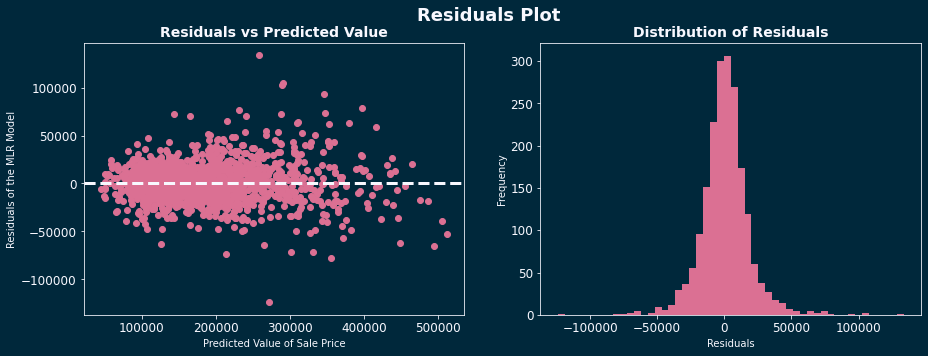

In [95]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize = (15,5))
fig.suptitle('Residuals Plot')
ax1.set_title('Residuals vs Predicted Value')
ax1.scatter(np.exp(yz_preds), resids, color = 'palevioletred')
ax1.axhline(y=0, color='ghostwhite', linestyle='--', linewidth=3)
ax1.set_xlabel('Predicted Value of Sale Price', )
ax1.set_ylabel('Residuals of the MLR Model')

ax2.set_title('Distribution of Residuals')
ax2.hist(resids, color = 'palevioletred', bins=50)
ax2.set_xlabel('Residuals', )
ax2.set_ylabel('Frequency')
format_fig(fig, 'NoFormatting')
fig.savefig('../imgs/Validating_LINEM_Assumptions_LR_Model.png', dpi=100, bbox_inches='tight')




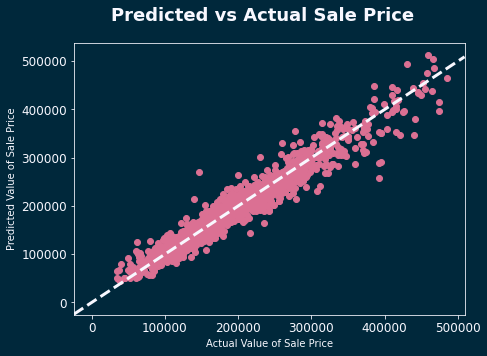

In [96]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, constrained_layout=False, figsize = (7,5))
fig.suptitle('Predicted vs Actual Sale Price')
#ax1.set_title('Residuals vs Predicted Value')
ax1.scatter(yz, np.exp(yz_preds), color = 'palevioletred')
ax1.set_xlabel('Actual Value of Sale Price', )
ax1.set_ylabel('Predicted Value of Sale Price')
ax1.axline([0, 0], [1, 1], color='ghostwhite', linestyle='--', linewidth=3)

format_fig(fig, 'NoFormatting')

fig.savefig('../imgs/Predicted_vs_Actual_SalePrice_LR_Model.png', dpi=100, bbox_inches='tight')



In [97]:
pd.DataFrame(lr.coef_, index=Xz.columns)

,0
Total Bsmt SF,0.000080
Gr Liv Area,0.000261
age_when_sold,-0.001318
age_when_remodeled,-0.001607
Porch Total SF,0.000104
Foundation_CBlock,0.024994
Foundation_Other,0.051542
Foundation_PConc,0.047494
MS Zoning_C (all),-0.188174
MS Zoning_FV,0.042260


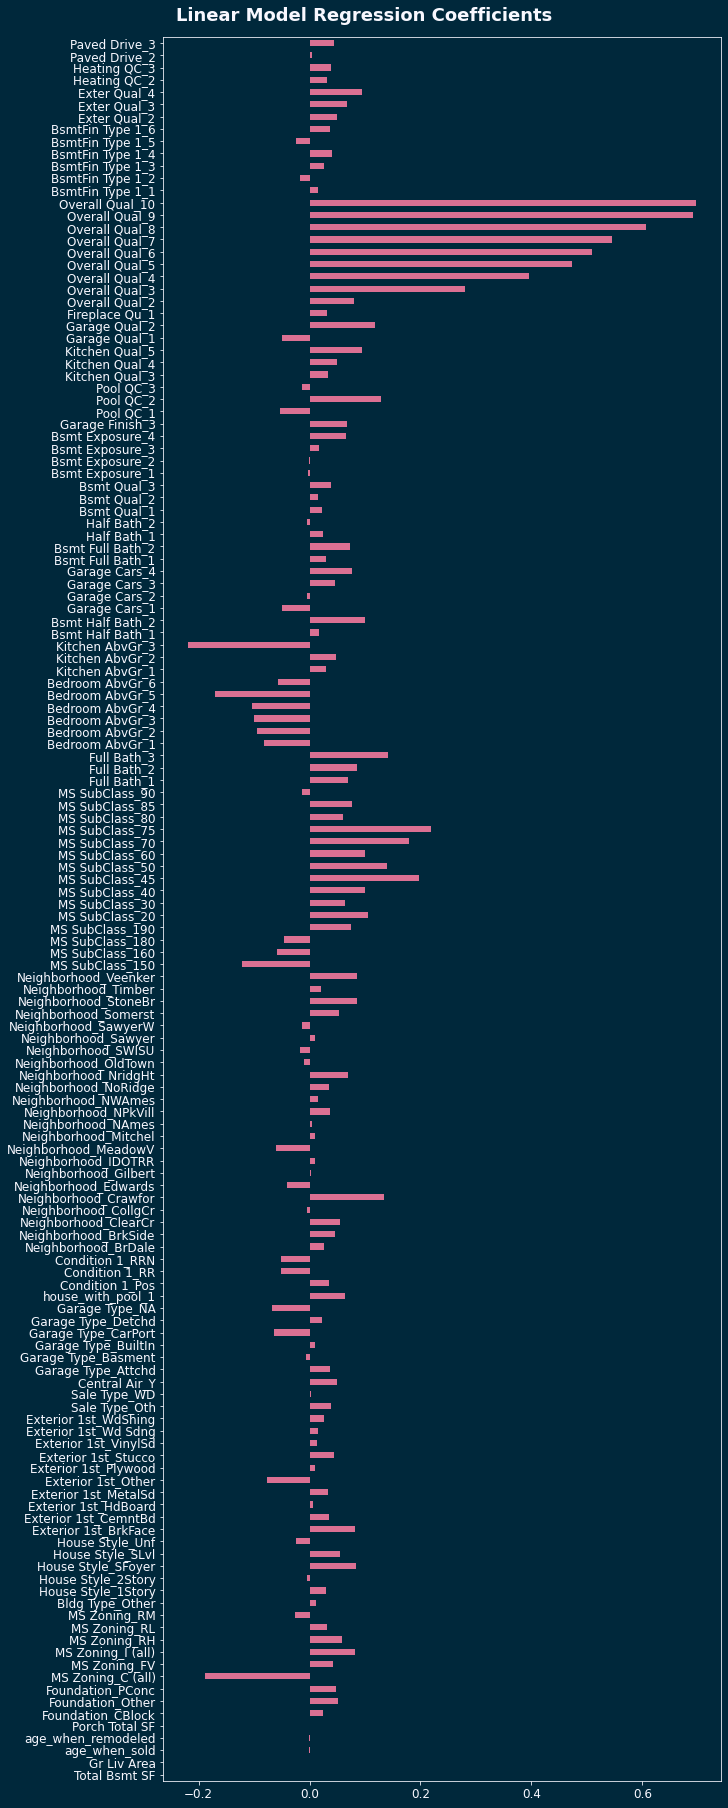

In [98]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize = (10,25))
fig.suptitle('Linear Model Regression Coefficients')
pd.DataFrame(lr.coef_, index=Xz.columns).plot.barh(ax=ax1, facecolor='palevioletred')
lgd = ax1.legend()
lgd.set_visible(False)
format_fig(fig, 'NoFormatting')
fig.savefig('../imgs/Linear_Model_Regression_Coefficients.png', dpi=dpi, bbox_inches='tight')



In [99]:
list(Xz_train.columns)

['Total Bsmt SF',
 'Gr Liv Area',
 'age_when_sold',
 'age_when_remodeled',
 'Porch Total SF',
 'Foundation_CBlock',
 'Foundation_Other',
 'Foundation_PConc',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Bldg Type_Other',
 'House Style_1Story',
 'House Style_2Story',
 'House Style_SFoyer',
 'House Style_SLvl',
 'House Style_Unf',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Other',
 'Exterior 1st_Plywood',
 'Exterior 1st_Stucco',
 'Exterior 1st_VinylSd',
 'Exterior 1st_Wd Sdng',
 'Exterior 1st_WdShing',
 'Sale Type_Oth',
 'Sale Type_WD',
 'Central Air_Y',
 'Garage Type_Attchd',
 'Garage Type_Basment',
 'Garage Type_BuiltIn',
 'Garage Type_CarPort',
 'Garage Type_Detchd',
 'Garage Type_NA',
 'house_with_pool_1',
 'Condition 1_Pos',
 'Condition 1_RR',
 'Condition 1_RRN',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighb